Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8995 - loss: 0.3379 - val_accuracy: 0.9828 - val_loss: 0.0603
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9853 - loss: 0.0457 - val_accuracy: 0.9859 - val_loss: 0.0464
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.9893 - val_loss: 0.0362
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9872 - val_loss: 0.0428
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9886 - val_loss: 0.0411
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9914 - val_loss: 0.0355
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9910 - val_loss: 0.0363
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9981 -

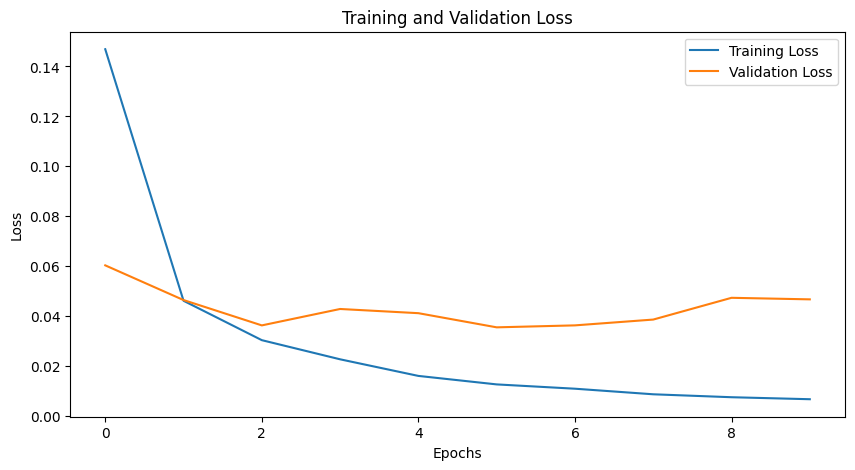

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


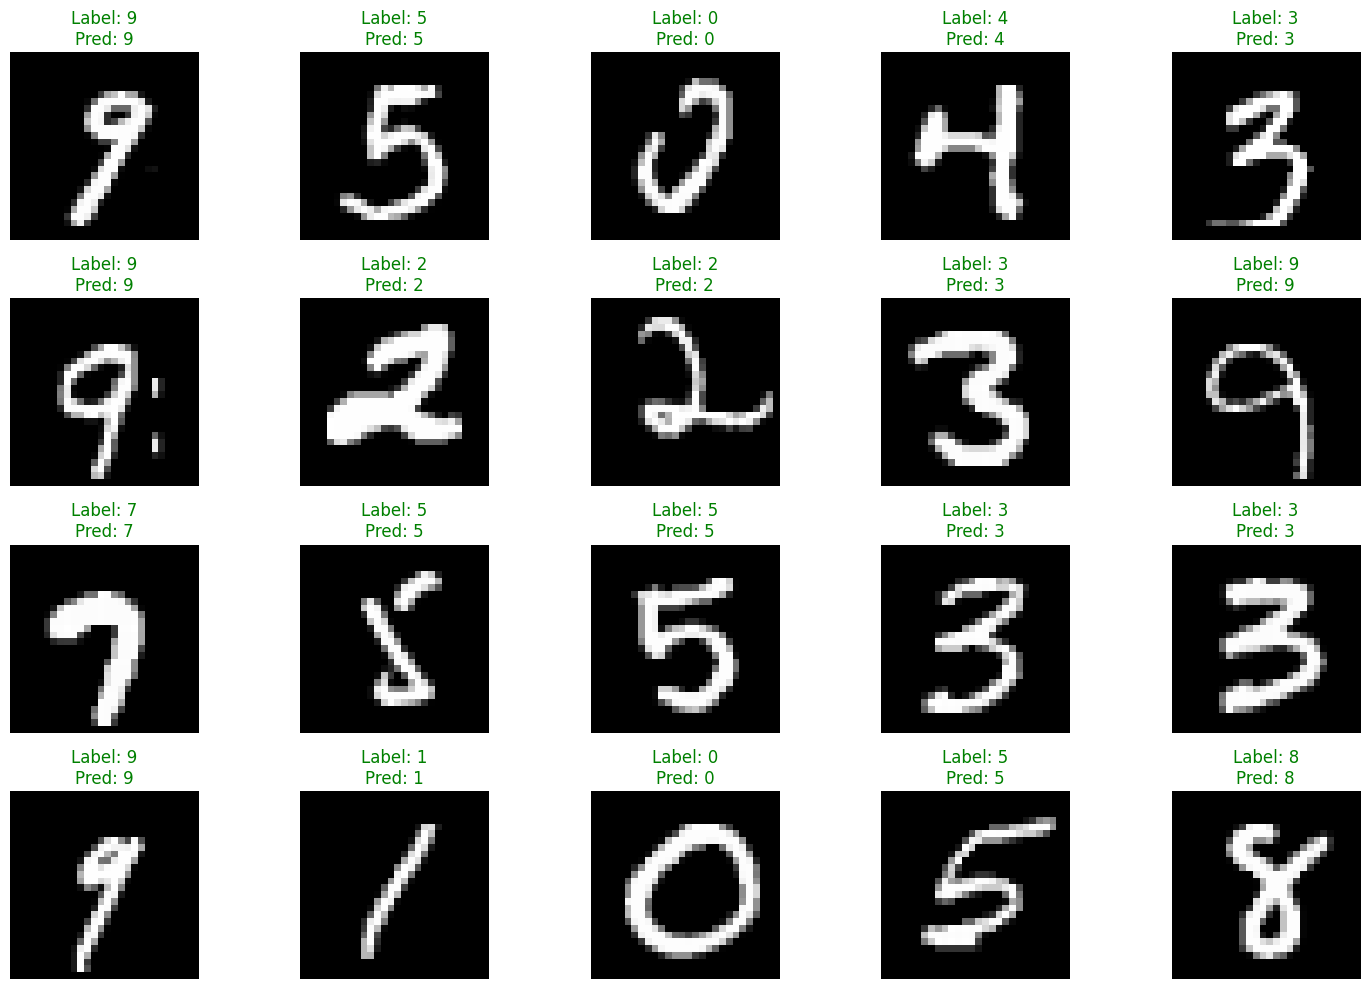

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape to include channel dimension
x_test = x_test.astype('float32') / 255.0  # Normalize test set
x_test = x_test.reshape(-1, 28, 28, 1)  # Reshape to include channel dimension

# Build the neural network model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with 64 filters
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    Flatten(),  # Flatten the 3D feature maps to 1D vectors
    Dense(128, activation='relu'),  # Fully connected layer with 128 units
    Dense(10, activation='softmax') # Output layer with 10 units and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess the labels
y_train = y_train.reshape(-1, )  # Ensure labels are in the correct shape for sparse categorical crossentropy

# Train the model with validation split
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot 20 random images with predictions and color code
indices = np.random.choice(len(x_train), 20, replace=False)
images = x_train[indices]
labels = y_train[indices]
predictions = np.argmax(model.predict(images), axis=1)

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    color = 'green' if predictions[i] == labels[i] else 'red'
    plt.title(f"Label: {labels[i]}\nPred: {predictions[i]}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()
